#Importing Library

In [1]:
!pip install scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [4]:
import operator
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from scipy import stats as ss

# Step 1: Load the Data

In [5]:
Full_Data = pd.read_csv('star_classification.csv')
Full_Data.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


#Data Visualizatiomn




In [6]:
Full_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [7]:
Full_Data.describe()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,redshift,plate,MJD,fiber_ID
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.237665e+18,177.629117,24.135305,21.980468,20.531387,19.645762,19.084854,18.668810,4481.366060,301.0,3.511610,186.130520,5.783882e+18,0.576661,5137.009660,55588.647500,449.312740
std,8.438560e+12,96.502241,19.644665,31.769291,31.750292,1.854760,1.757895,31.728152,1964.764593,0.0,1.586912,149.011073,3.324016e+18,0.730707,2952.303351,1808.484233,272.498404
min,1.237646e+18,0.005528,-18.785328,-9999.000000,-9999.000000,9.822070,9.469903,-9999.000000,109.000000,301.0,1.000000,11.000000,2.995191e+17,-0.009971,266.000000,51608.000000,1.000000
25%,1.237659e+18,127.518222,5.146771,20.352353,18.965230,18.135828,17.732285,17.460677,3187.000000,301.0,2.000000,82.000000,2.844138e+18,0.054517,2526.000000,54234.000000,221.000000
50%,1.237663e+18,180.900700,23.645922,22.179135,21.099835,20.125290,19.405145,19.004595,4188.000000,301.0,4.000000,146.000000,5.614883e+18,0.424173,4987.000000,55868.500000,433.000000
75%,1.237668e+18,233.895005,39.901550,23.687440,22.123767,21.044785,20.396495,19.921120,5326.000000,301.0,5.000000,241.000000,8.332144e+18,0.704154,7400.250000,56777.000000,645.000000
max,1.237681e+18,359.999810,83.000519,32.781390,31.602240,29.571860,32.141470,29.383740,8162.000000,301.0,6.000000,989.000000,1.412694e+19,7.011245,12547.000000,58932.000000,1000.000000


In [8]:
Full_Data.isnull().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


In [9]:
Full_Data.duplicated().sum()

0

In [10]:
Full_Data.size

1800000

In [11]:
Full_Data.shape

(100000, 18)

In [12]:
dataset = Full_Data.copy()

In [13]:
dataset.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


In [14]:
for column in dataset.columns:
    unique_count = dataset[column].nunique()
    print(f"Column '{column}' has {unique_count} unique values.")

Column 'obj_ID' has 78053 unique values.
Column 'alpha' has 99999 unique values.
Column 'delta' has 99999 unique values.
Column 'u' has 93748 unique values.
Column 'g' has 92651 unique values.
Column 'r' has 91901 unique values.
Column 'i' has 92019 unique values.
Column 'z' has 92007 unique values.
Column 'run_ID' has 430 unique values.
Column 'rerun_ID' has 1 unique values.
Column 'cam_col' has 6 unique values.
Column 'field_ID' has 856 unique values.
Column 'spec_obj_ID' has 100000 unique values.
Column 'class' has 3 unique values.
Column 'redshift' has 99295 unique values.
Column 'plate' has 6284 unique values.
Column 'MJD' has 2180 unique values.
Column 'fiber_ID' has 1000 unique values.


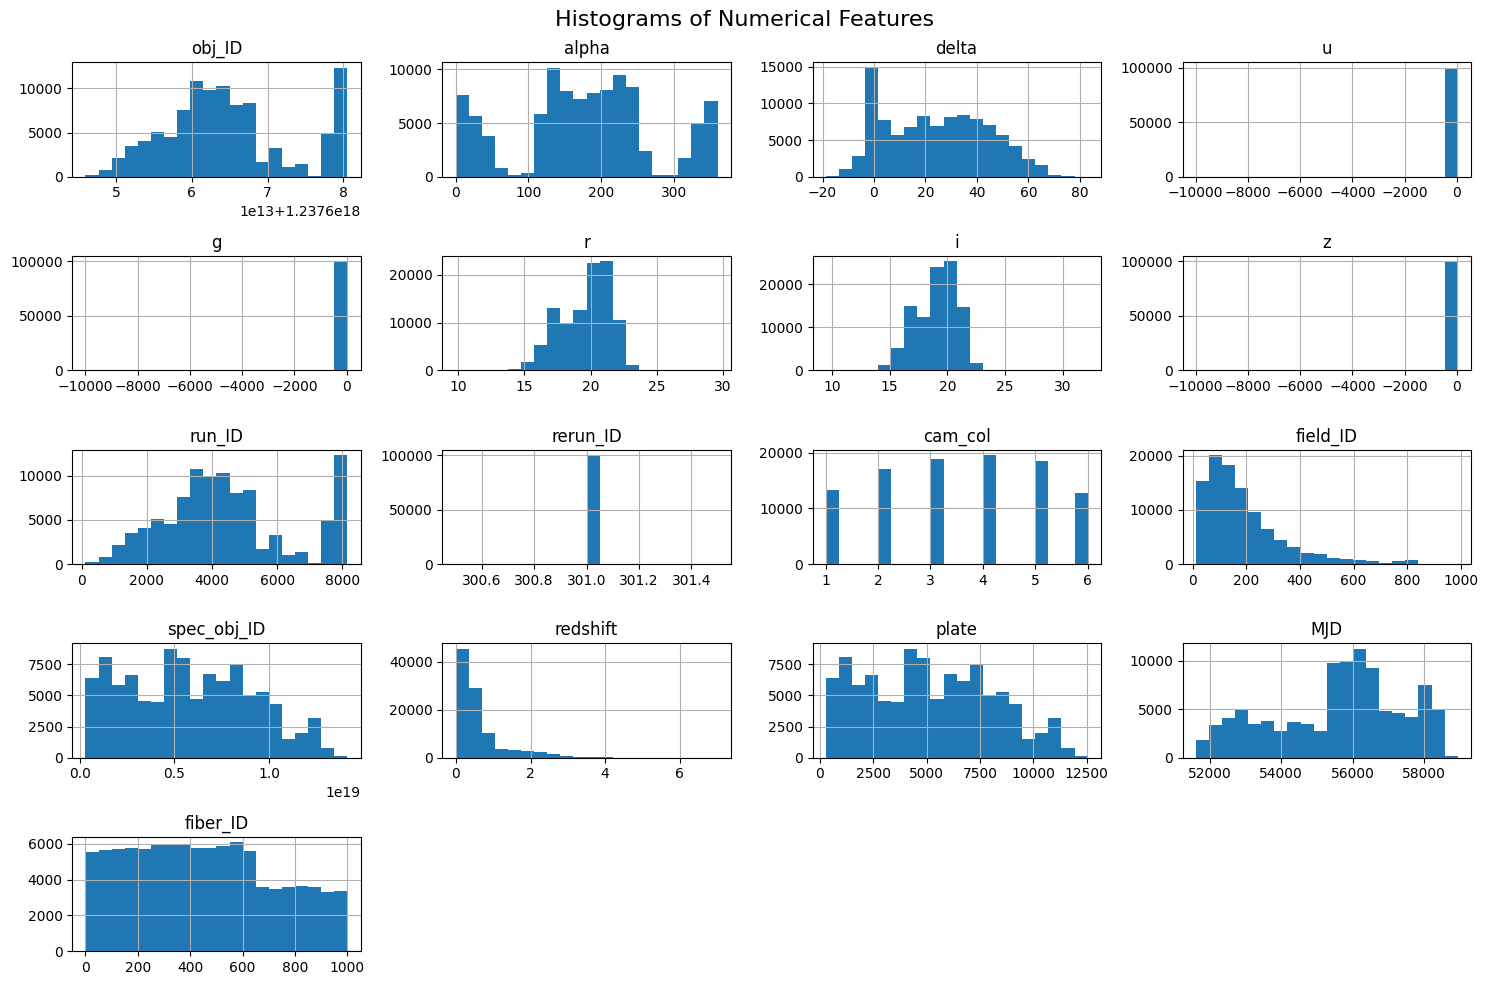

In [15]:
# 1. Histograms for numerical features
numerical_features = dataset.select_dtypes(include=['number']).columns.tolist()
Full_Data[numerical_features].hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

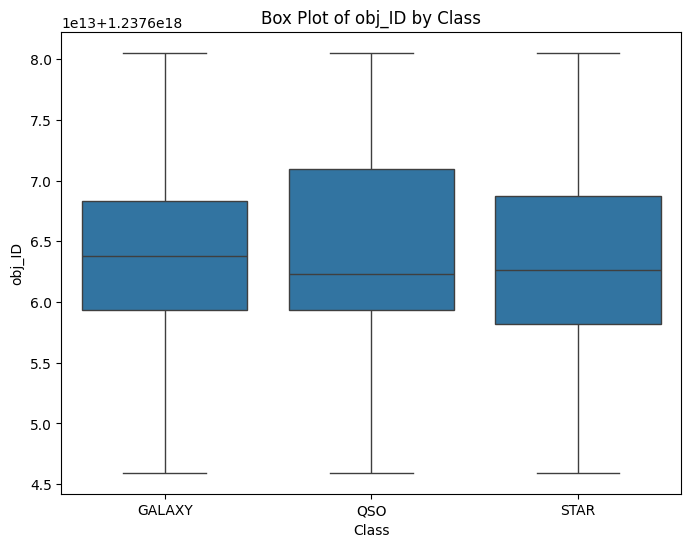

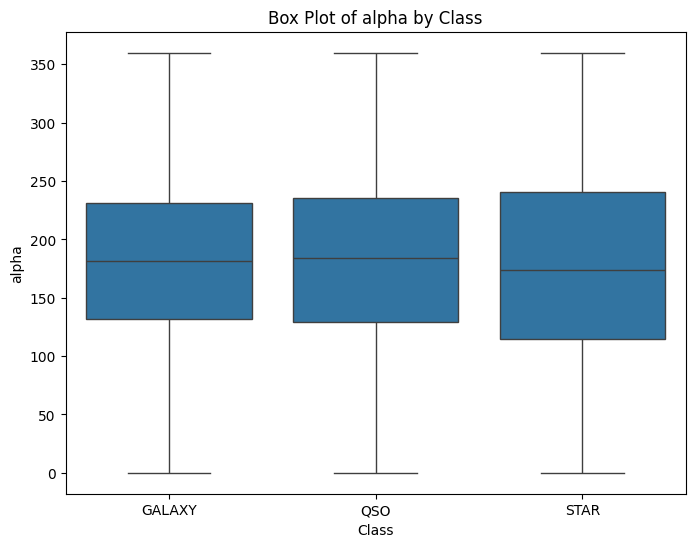

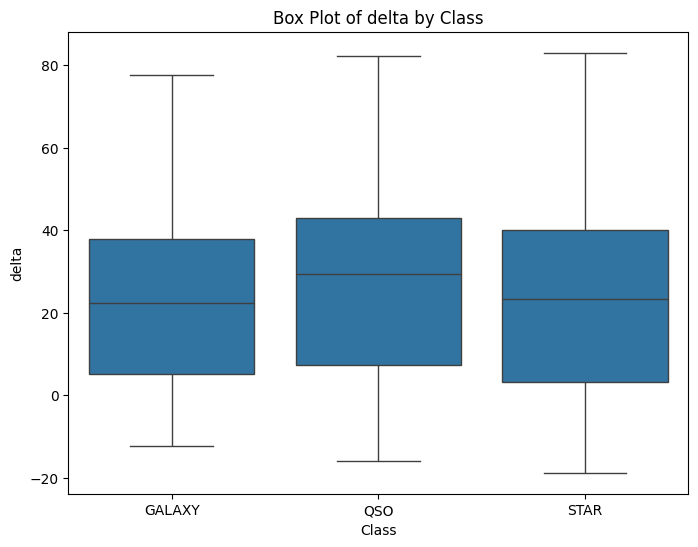

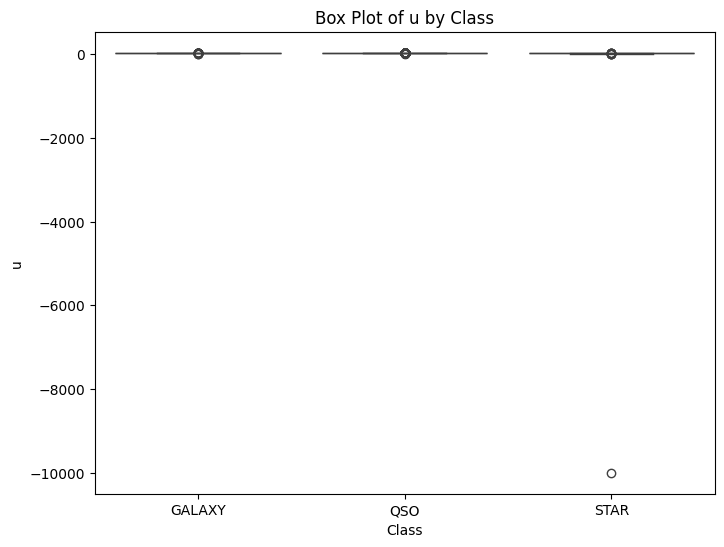

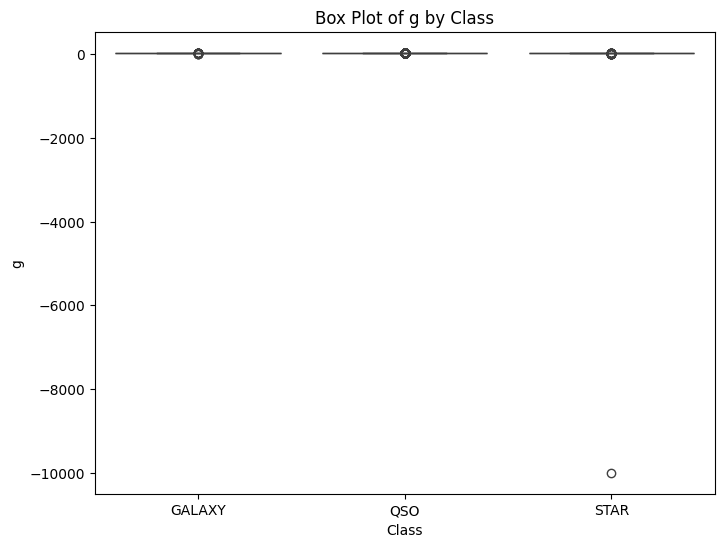

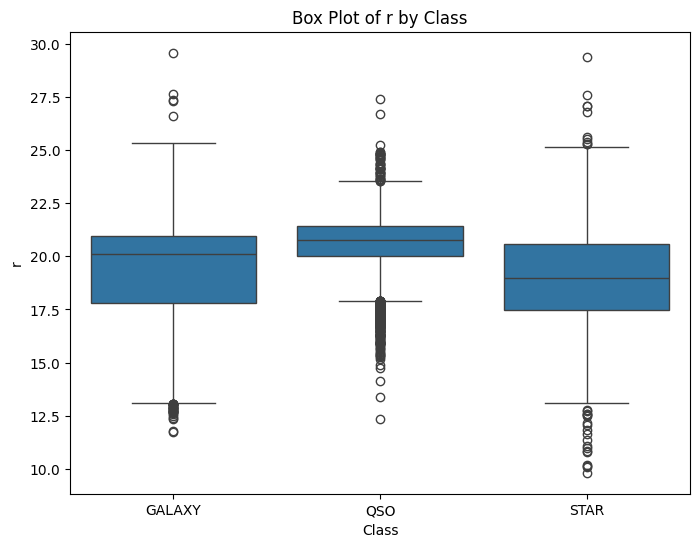

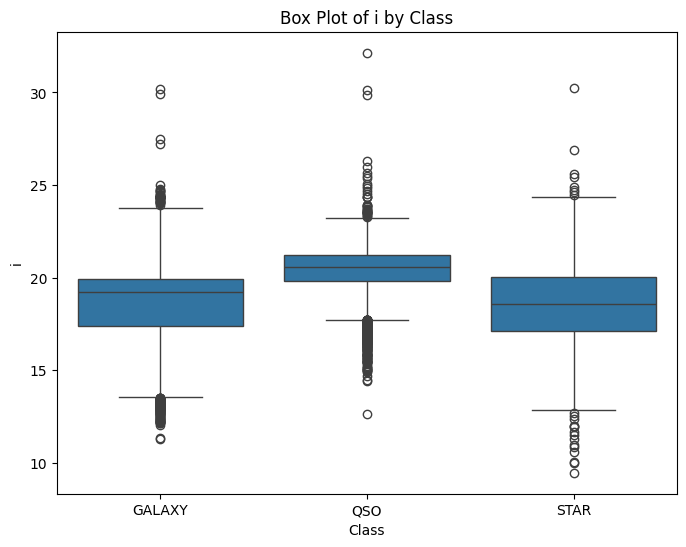

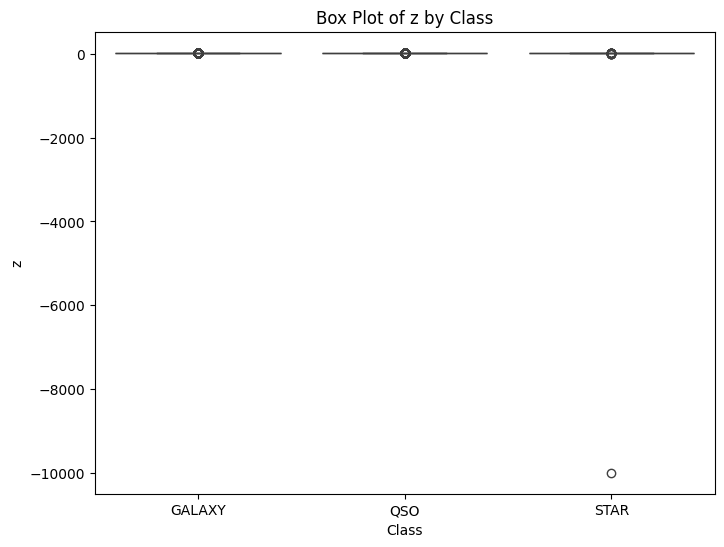

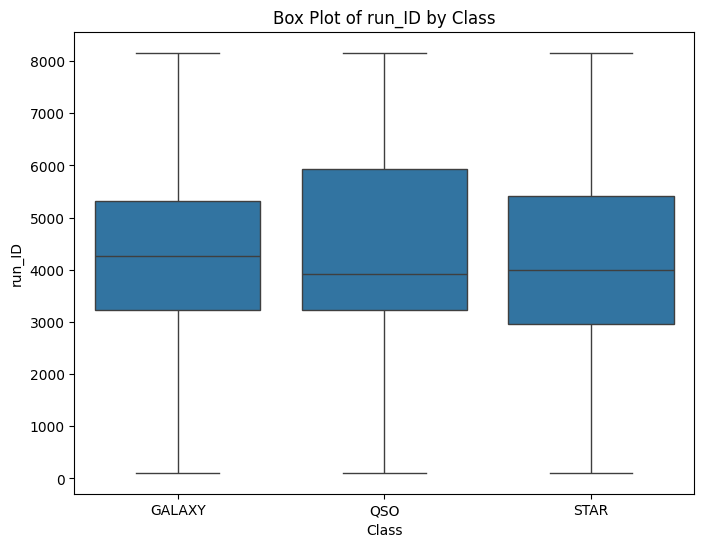

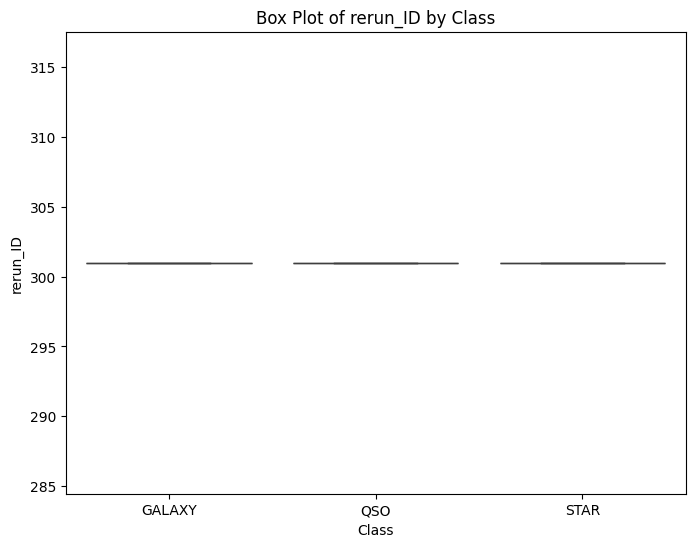

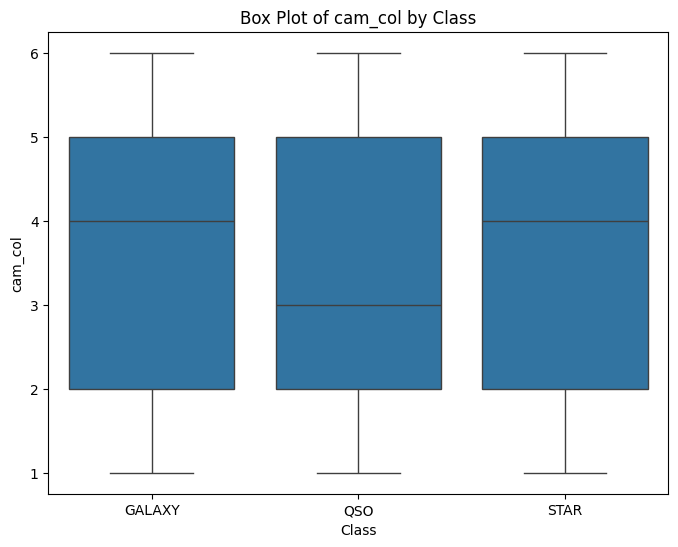

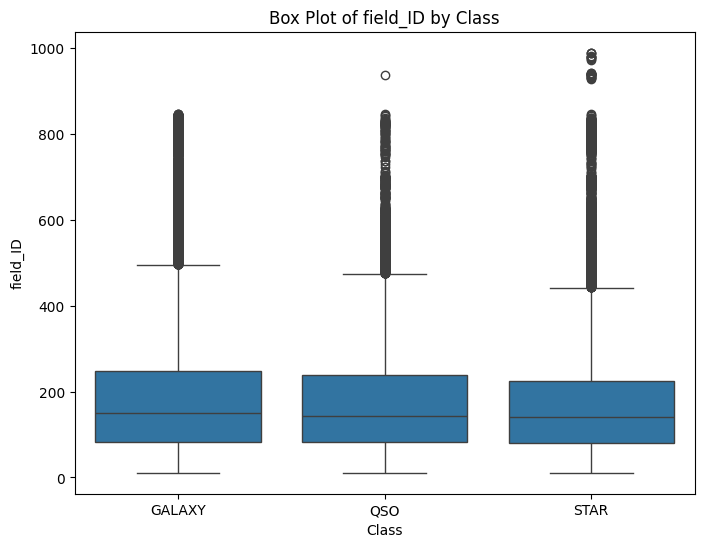

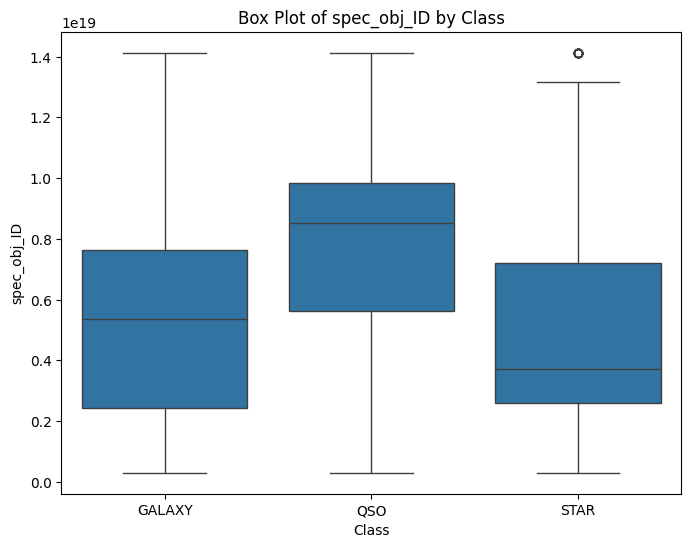

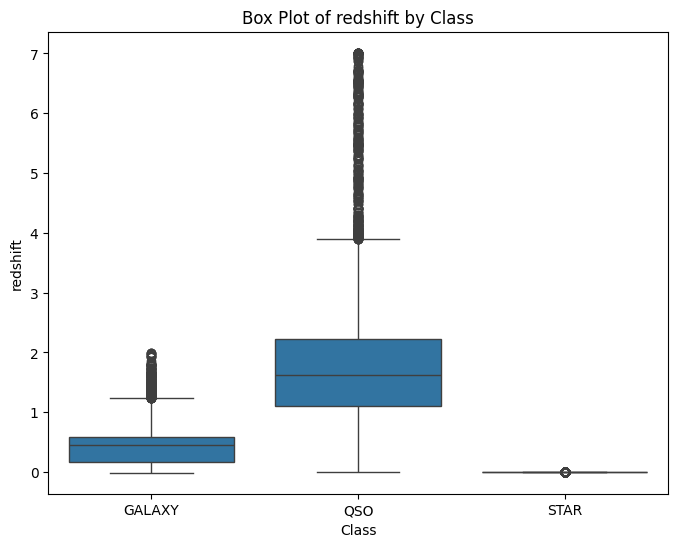

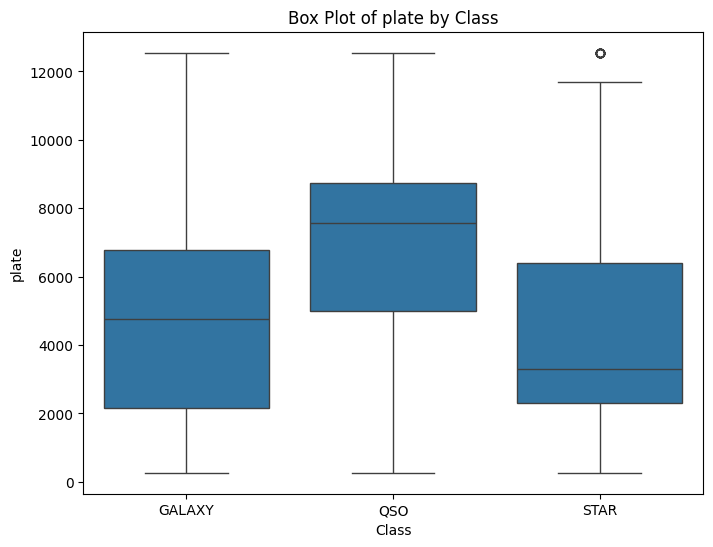

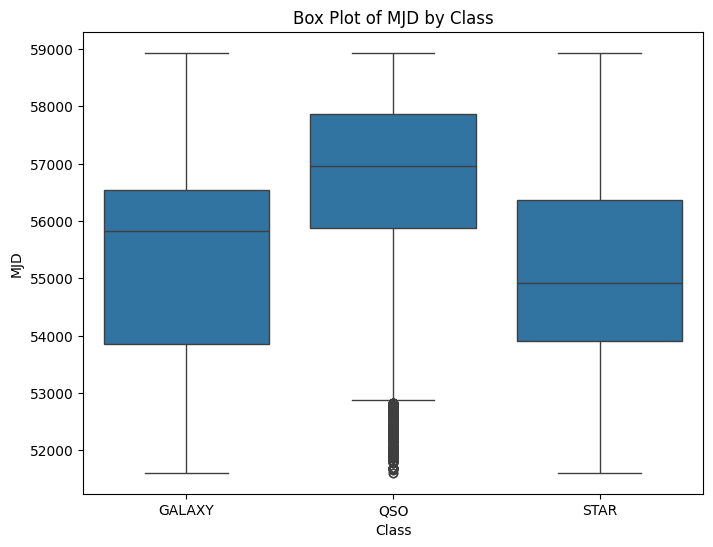

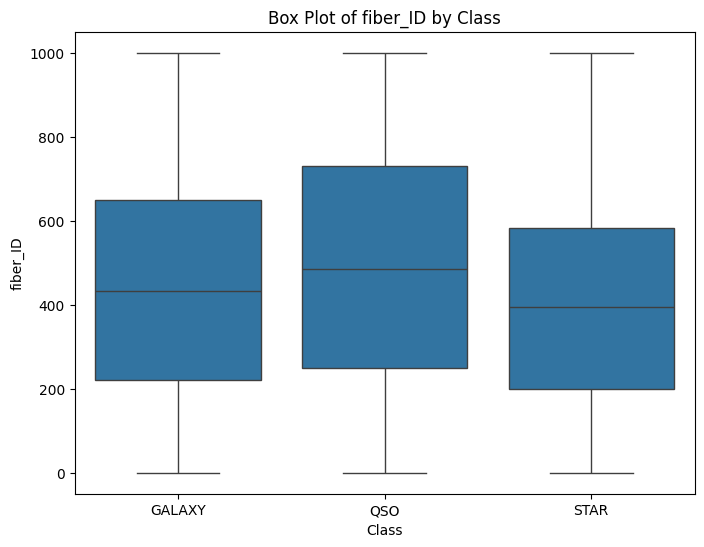

In [16]:
# 2. Box plots for numerical features grouped by 'Segmentation'
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='class', y=feature, data=dataset)
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature} by Class')
    plt.show()

Feature 'rerun_ID' has only one unique value and will be skipped for discretization.
Either 'obj_ID' or 'rerun_ID' has only one unique value and will be skipped for chi-square test.
Either 'alpha' or 'rerun_ID' has only one unique value and will be skipped for chi-square test.
Either 'delta' or 'rerun_ID' has only one unique value and will be skipped for chi-square test.
Either 'u' or 'rerun_ID' has only one unique value and will be skipped for chi-square test.
Either 'g' or 'rerun_ID' has only one unique value and will be skipped for chi-square test.
Either 'r' or 'rerun_ID' has only one unique value and will be skipped for chi-square test.
Either 'i' or 'rerun_ID' has only one unique value and will be skipped for chi-square test.
Either 'z' or 'rerun_ID' has only one unique value and will be skipped for chi-square test.
Either 'run_ID' or 'rerun_ID' has only one unique value and will be skipped for chi-square test.
Either 'rerun_ID' or 'obj_ID' has only one unique value and will be s

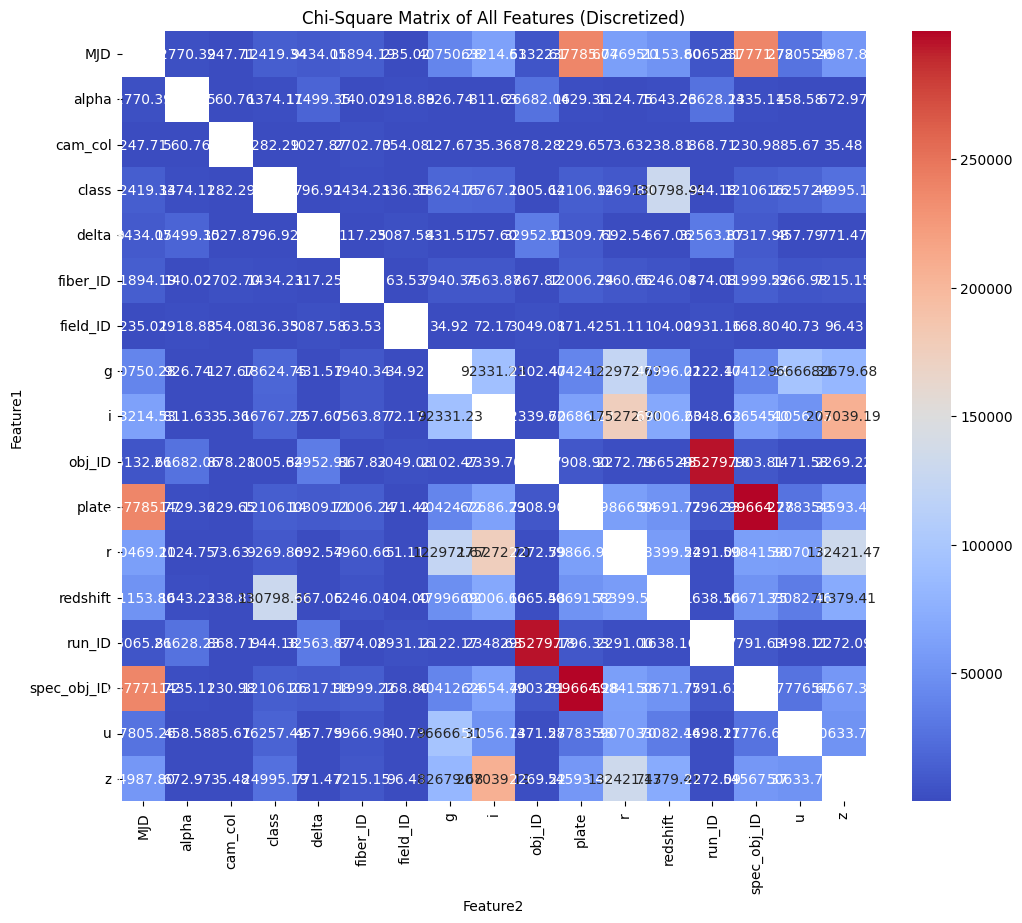

In [17]:

#1. Select all features (columns)
all_features = dataset.columns.tolist()

# 2. Discretize numerical features into categories

# Select numerical features EXCLUDING object type (string)
numerical_features = dataset.select_dtypes(exclude=['object']).columns.tolist()
for feature in numerical_features:
    # Check for unique values before qcut to avoid empty contingency tables
    if dataset[feature].nunique() > 1:  # Proceed only if more than one unique value
        dataset[feature] = pd.qcut(dataset[feature], q=4, duplicates='drop', labels=False)
    else:
        print(f"Feature '{feature}' has only one unique value and will be skipped for discretization.")

# 3. Create contingency table for each pair of features
chi2_results = []
for feature1 in all_features:  # Use all_features instead of numerical_features
    for feature2 in all_features:  # Use all_features instead of numerical_features
        if feature1 != feature2:
            # Check for unique values in both features before creating the contingency table
            if dataset[feature1].nunique() > 1 and dataset[feature2].nunique() > 1:
                contingency_table = pd.crosstab(dataset[feature1], dataset[feature2])

                # Check if the contingency table is empty before applying chi2_contingency
                if contingency_table.empty:
                    print(f"Contingency table for '{feature1}' and '{feature2}' is empty and will be skipped.")
                else:
                    chi2, p, dof, expected = chi2_contingency(contingency_table)
                    chi2_results.append([feature1, feature2, chi2, p])
            else:
                print(f"Either '{feature1}' or '{feature2}' has only one unique value and will be skipped for chi-square test.")

# 4. Create a DataFrame from chi-square results
chi2_df = pd.DataFrame(chi2_results, columns=['Feature1', 'Feature2', 'Chi-Square', 'p-value'])

# 5. Pivot the DataFrame to create a matrix for heatmap
chi2_matrix = chi2_df.pivot(index='Feature1', columns='Feature2', values='Chi-Square')

# 6. Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(chi2_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Chi-Square Matrix of All Features (Discretized)')
plt.show()

In [18]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))


In [19]:
dataset.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [20]:
def calculate_cramers_v_matrix(df, columns):

    cramers_v_matrix = pd.DataFrame(index=columns, columns=columns)
    for col1 in columns:
        for col2 in columns:
            if col1 != col2:
                cramers_v_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])
            else:
                cramers_v_matrix.loc[col1, col2] = 1.0  # Correlation with itself is 1
    return cramers_v_matrix

# and you want to calculate Cramer's V for columns 'Age', 'Segmentation', etc.
columns_of_interest = ['u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID', 'class',
       'plate', 'fiber_ID']

cramers_v_result = calculate_cramers_v_matrix(dataset, columns_of_interest)

# Print the Cramer's V matrix
print(cramers_v_result)

                 u         g         r         i         z    run_ID  \
u              1.0  0.567627   0.44371   0.41251  0.410797  0.070455   
g         0.567627       1.0  0.640227  0.554752  0.524954  0.083929   
r          0.44371  0.640227       1.0  0.764349   0.66437  0.087218   
i          0.41251  0.554752  0.764349       1.0  0.830735  0.088312   
z         0.410797  0.524954   0.66437  0.830735       1.0  0.086855   
run_ID    0.070455  0.083929  0.087218  0.088312  0.086855       1.0   
cam_col   0.015986  0.019889  0.014678  0.009375  0.009395  0.053533   
field_ID  0.010284  0.009296  0.011847  0.014512  0.017071  0.098696   
class      0.28506  0.305116  0.215221  0.289496   0.35348  0.068491   
plate     0.304276  0.367046  0.446691  0.457089   0.42656  0.161117   
fiber_ID  0.140927    0.1626  0.162808  0.158694  0.154988    0.0537   

           cam_col  field_ID     class     plate  fiber_ID  
u         0.015986  0.010284   0.28506  0.304276  0.140927  
g         0.0

In [21]:
columns_to_compare =['u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID', 'class',
       'plate', 'fiber_ID']

for column in columns_to_compare:
    cramers_v_value = cramers_v(dataset['class'], dataset[column])
    print(f"Cramer's V for 'class' and '{column}': {cramers_v_value}")

Cramer's V for 'class' and 'u': 0.2850597600908601
Cramer's V for 'class' and 'g': 0.30511571205757154
Cramer's V for 'class' and 'r': 0.21522065929193912
Cramer's V for 'class' and 'i': 0.2894958528407714
Cramer's V for 'class' and 'z': 0.3534804742445911
Cramer's V for 'class' and 'run_ID': 0.06849090387306134
Cramer's V for 'class' and 'cam_col': 0.03716849969288418
Cramer's V for 'class' and 'field_ID': 0.025529261624107683
Cramer's V for 'class' and 'class': 0.9999999999999999
Cramer's V for 'class' and 'plate': 0.24597132914322287
Cramer's V for 'class' and 'fiber_ID': 0.08450610718965461


In [22]:
import itertools

columns_of_interest = ['u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID', 'class',
       'plate', 'fiber_ID']

high_cramers_v_columns = []  # List to store column pairs with high Cramer's V

for col1, col2 in itertools.combinations(columns_of_interest, 2):
    cramers_v_value = cramers_v(dataset[col1], dataset[col2])

    if cramers_v_value > 0.1:  # Apply the condition
        print(f"Cramer's V for '{col1}' and '{col2}': {cramers_v_value}")
        high_cramers_v_columns.append((col1, col2))  # Add the pair to the list

print("\nList of column pairs with Cramer's V > 0.2:")
for col1, col2 in high_cramers_v_columns:
    print(f"('{col1}', '{col2}')")
    dataset_col = high_cramers_v_columns

Cramer's V for 'u' and 'g': 0.5676272544924122
Cramer's V for 'u' and 'r': 0.4437096323492759
Cramer's V for 'u' and 'i': 0.41250964418290853
Cramer's V for 'u' and 'z': 0.41079710107509426
Cramer's V for 'u' and 'class': 0.2850597600908601
Cramer's V for 'u' and 'plate': 0.3042759778812062
Cramer's V for 'u' and 'fiber_ID': 0.1409274053706775
Cramer's V for 'g' and 'r': 0.640227447963229
Cramer's V for 'g' and 'i': 0.5547521927866764
Cramer's V for 'g' and 'z': 0.5249544741985869
Cramer's V for 'g' and 'class': 0.30511571205757154
Cramer's V for 'g' and 'plate': 0.36704647006907437
Cramer's V for 'g' and 'fiber_ID': 0.16259951663736763
Cramer's V for 'r' and 'i': 0.7643492970084879
Cramer's V for 'r' and 'z': 0.6643704915418749
Cramer's V for 'r' and 'class': 0.21522065929193912
Cramer's V for 'r' and 'plate': 0.4466905675381762
Cramer's V for 'r' and 'fiber_ID': 0.1628076231464287
Cramer's V for 'i' and 'z': 0.8307354205702105
Cramer's V for 'i' and 'class': 0.2894958528407714
Cramer

In [23]:
unique_columns = set()  # Using a set to automatically store only unique elements

for col1, col2 in high_cramers_v_columns:
    unique_columns.add(col1)
    unique_columns.add(col2)

print("Unique column names:", unique_columns)

Unique column names: {'r', 'z', 'plate', 'fiber_ID', 'i', 'u', 'class', 'g', 'run_ID'}


# Step 2: Preprocess the Data

In [24]:
df = Full_Data.copy()

In [25]:
df = df.dropna()

In [26]:
df.isnull().sum()

,0
obj_ID,0
alpha,0
delta,0
u,0
g,0
r,0
i,0
z,0
run_ID,0
rerun_ID,0


In [27]:
#Columns to drop
column_dropped = ['obj_ID','alpha','delta','redshift','MJD','rerun_ID', 'spec_obj_ID']
df.drop(column_dropped, axis=1, inplace=True)

In [28]:
df.columns

Index(['u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID', 'class',
       'plate', 'fiber_ID'],
      dtype='object')

In [29]:
df.head()

,u,g,r,i,z,run_ID,cam_col,field_ID,class,plate,fiber_ID
0,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,GALAXY,5812,171
1,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,GALAXY,10445,427
2,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,GALAXY,4576,299
3,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,GALAXY,9149,775
4,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,GALAXY,6121,842


In [30]:
df.shape

(100000, 11)

In [31]:
# Assuming df is your DataFrame
columns_to_check = ['u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID',
                   'plate']  # Removed 'class' and 'fiber_ID'


# Function to remove outliers using IQR
def remove_outliers(df, out_columns):
    for column in out_columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1

        # Define the outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove outliers in place
        df.drop(df[(df[column] < lower_bound) | (df[column] > upper_bound)].index, inplace=True)

    return df

# Remove outliers from the numerical columns directly on df
df = remove_outliers(df, columns_to_check)

In [32]:
df.head()

,u,g,r,i,z,run_ID,cam_col,field_ID,class,plate,fiber_ID
0,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,GALAXY,5812,171
1,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,GALAXY,10445,427
2,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,GALAXY,4576,299
3,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,GALAXY,9149,775
4,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,GALAXY,6121,842


In [33]:
df.shape

(94214, 11)

In [34]:
df['class'] = df['class'].map({'GALAXY': 0, 'STAR': 1, 'QSO': 2})

In [35]:
df.head()

,u,g,r,i,z,run_ID,cam_col,field_ID,class,plate,fiber_ID
0,23.87882,22.27530,20.39501,19.16573,18.79371,3606,2,79,0,5812,171
1,24.77759,22.83188,22.58444,21.16812,21.61427,4518,5,119,0,10445,427
2,25.26307,22.66389,20.60976,19.34857,18.94827,3606,2,120,0,4576,299
3,22.13682,23.77656,21.61162,20.50454,19.25010,4192,3,214,0,9149,775
4,19.43718,17.58028,16.49747,15.97711,15.54461,8102,3,137,0,6121,842


In [36]:
df.columns

Index(['u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID', 'class',
       'plate', 'fiber_ID'],
      dtype='object')

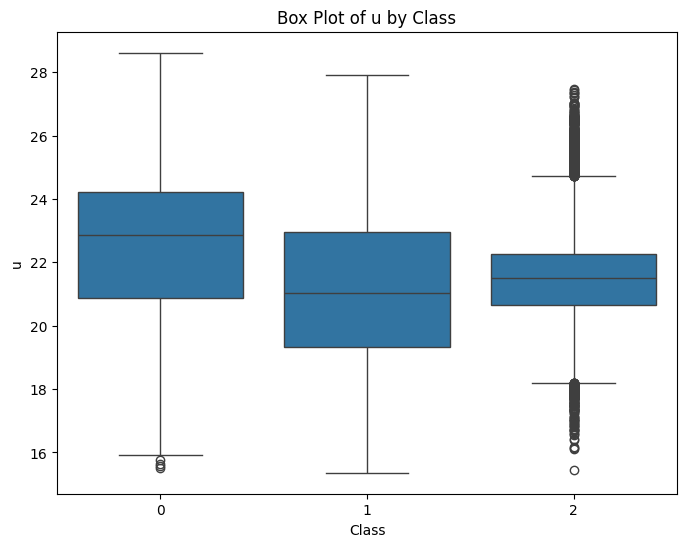

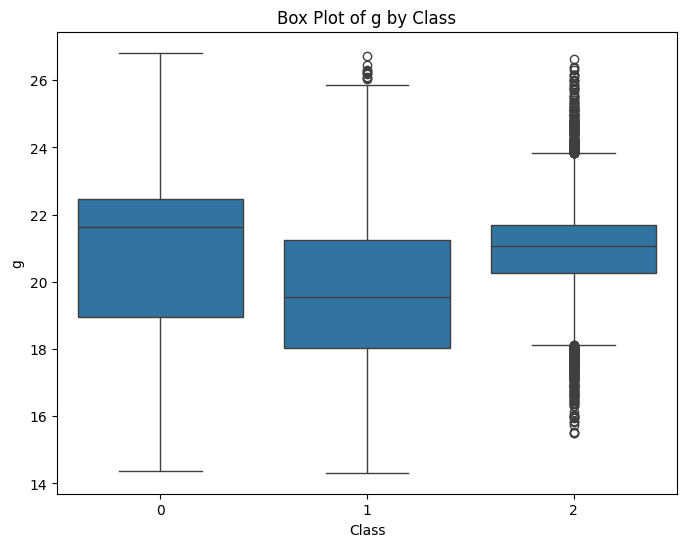

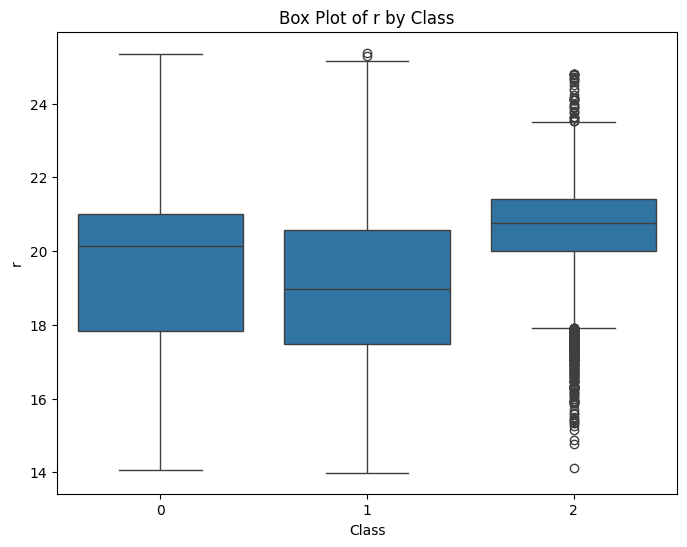

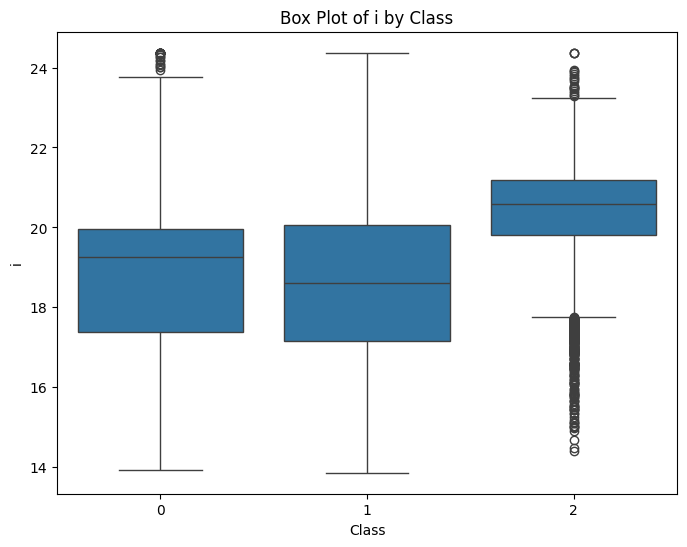

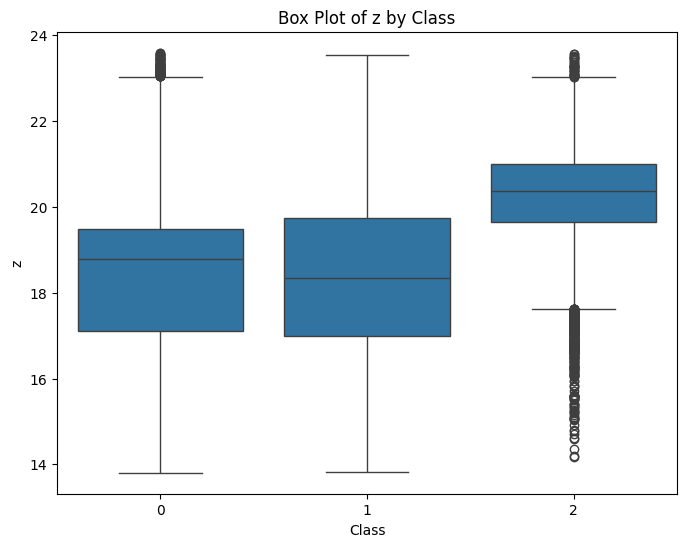

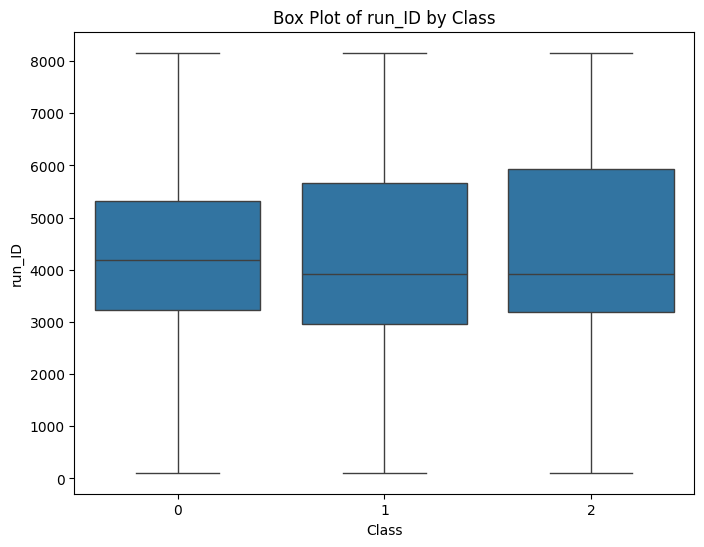

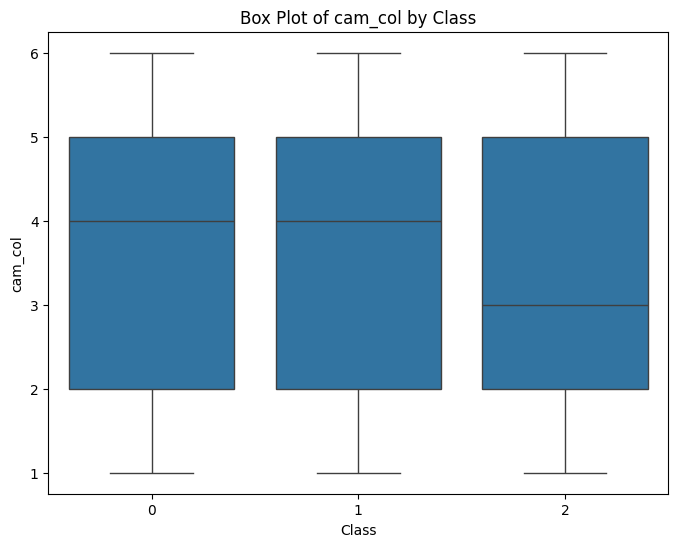

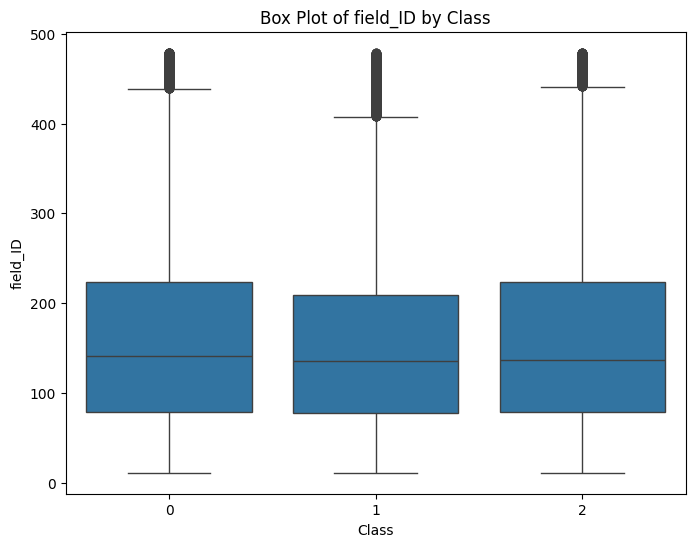

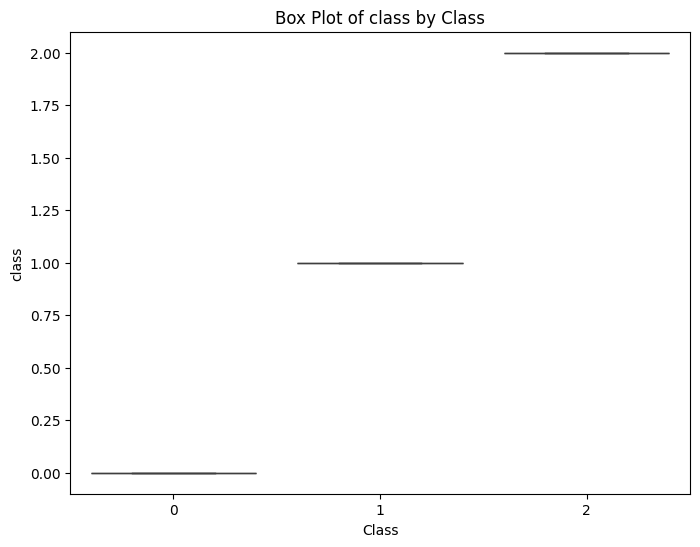

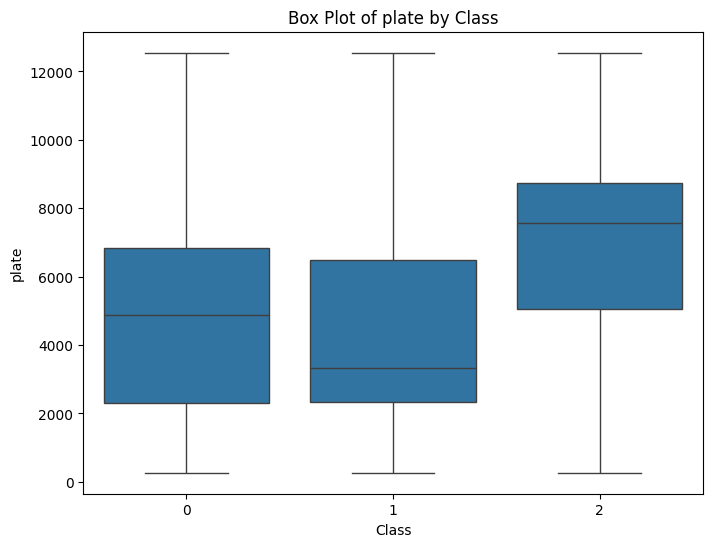

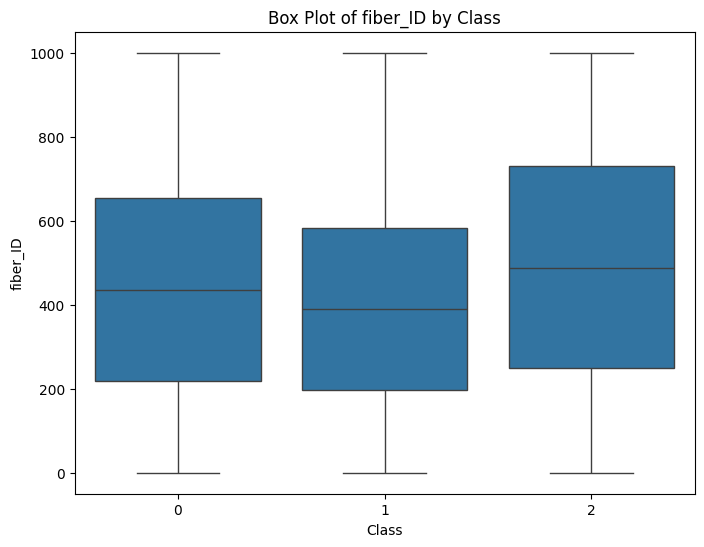

In [37]:
# 2. Box plots for numerical features grouped by 'Class'
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='class', y=feature, data=df)
    plt.xlabel('Class')
    plt.ylabel(feature)
    plt.title(f'Box Plot of {feature} by Class')
    plt.show()

In [38]:
def get_max_min_in_all_columns(df):
    # Get the maximum and minimum values in all columns
    max_values = df.max()
    min_values = df.min()
    mean_values = df.mean()
    std_values = df.std()
    #return max_values, min_values, mean_values, std_values # This line is not needed


    # Create a dictionary to store the data
    data = {
        'Max': max_values,
        'Min': min_values,
        'Mean': mean_values,
        'Std': std_values
    }

    # Create a DataFrame from the dictionary
    stats_table = pd.DataFrame(data)

    return stats_table

# Call the function to get the stats table
# Changed from get_stats_table to get_max_min_in_all_columns
stats_table = get_max_min_in_all_columns(df)

# Display the table
print(stats_table)

                  Max        Min         Mean          Std
u            28.61868   15.35842    22.099970     2.233196
g            26.81736   14.31845    20.656160     2.013075
r            25.37730   13.99044    19.672608     1.828885
i            24.37122   13.86217    19.110202     1.730729
z            23.59228   13.80535    18.793947     1.738516
run_ID     8162.00000  109.00000  4475.382544  1966.750234
cam_col       6.00000    1.00000     3.522820     1.589441
field_ID    479.00000   11.00000   160.948330   104.754250
class         2.00000    0.00000     0.602734     0.790932
plate     12547.00000  266.00000  5215.164986  2937.976602
fiber_ID   1000.00000    1.00000   450.100399   273.515664


#Data Normalization

In [51]:

from sklearn.preprocessing import MinMaxScaler


# Create scaler and transform data
scaler = MinMaxScaler()
numerical_features = ['u', 'g', 'r', 'i', 'z', 'run_ID', 'cam_col', 'field_ID',
       'plate', 'fiber_ID']
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the normalized data
df.head()

,u,g,r,i,z,run_ID,cam_col,field_ID,class,plate,fiber_ID
0,0.642552,0.636604,0.562453,0.504666,0.509696,0.434248,0.2,0.145299,0,0.451592,0.170170
1,0.710331,0.681134,0.754730,0.695206,0.797893,0.547498,0.8,0.230769,0,0.828841,0.426426
2,0.746942,0.667693,0.581312,0.522064,0.525489,0.434248,0.2,0.232906,0,0.350949,0.298298
3,0.511182,0.756715,0.669296,0.632062,0.556329,0.507016,0.4,0.433761,0,0.723312,0.774775
4,0.307593,0.260969,0.220169,0.201249,0.177713,0.992549,0.4,0.269231,0,0.476753,0.841842


In [52]:
def get_max_min_in_all_columns_N(df):
    # Get the maximum and minimum values in all columns
    max_values = df.max()
    min_values = df.min()
    mean_values = df.mean()
    std_values = df.std()
    #return max_values, min_values, mean_values, std_values # This line is not needed


    # Create a dictionary to store the data
    data = {
        'Max': max_values,
        'Min': min_values,
        'Mean': mean_values,
        'Std': std_values
    }

    # Create a DataFrame from the dictionary
    stats_table = pd.DataFrame(data)

    return stats_table

# Call the function to get the stats table
# Changed from get_stats_table to get_max_min_in_all_columns
stats_table = get_max_min_in_all_columns_N(df)

# Display the table
print(stats_table)

          Max  Min      Mean       Std
u         1.0  0.0  0.508403  0.168413
g         1.0  0.0  0.507061  0.161060
r         1.0  0.0  0.499011  0.160614
i         1.0  0.0  0.499382  0.164689
z         1.0  0.0  0.509720  0.177637
run_ID    1.0  0.0  0.542206  0.244226
cam_col   1.0  0.0  0.504564  0.317888
field_ID  1.0  0.0  0.320402  0.223834
class     2.0  0.0  0.602734  0.790932
plate     1.0  0.0  0.402994  0.239229
fiber_ID  1.0  0.0  0.449550  0.273789


In [40]:
#'class' is the target variable
drop_columns = ['class']
X = df.drop(drop_columns, axis=1)
y = df['class']


#Step 3: Split the Data
#Split our dataset into train and test


In [41]:
#split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train a Model

#Train the model using linear regression

##Using Linear Regression

In [42]:
#trianing the data using linear regression
from sklearn.linear_model import LinearRegression

model_linear_reg = LinearRegression()
model_linear_reg.fit(X_train, y_train)

LinearRegression()

In [43]:
#Prediction performance using R square score
from sklearn.metrics import r2_score
y_train_pred = model_linear_reg.predict(X_train)

r2_train = r2_score(y_train, y_train_pred)
print(f"R-squared on training data: {r2_train:.2f}")

R-squared on training data: 0.44


##Using Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming X_train, y_train, X_test, y_test are already defined

# Create and train the model
log_regress = LogisticRegression()
log_regress.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
# Make predictions on the test set
y_pred = log_regress.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7606007535954996


##Using Random Forest Classifier

In [44]:
#training the data using random forest classifier
from sklearn.ensemble import RandomForestClassifier
model_random_fc = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_fc.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [45]:
# Predict on the training data
y_train_pred = model_random_fc.predict(X_train)

# Calculate the accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)

print("Accuracy on training data:", train_accuracy)

Accuracy on training data: 0.999973464595136


# Step 5: Evaluate the Model

In [46]:
from sklearn.metrics import mean_squared_error, r2_score

linear_reg_pred = model_linear_reg.predict(X_test)

mse = mean_squared_error(y_test, linear_reg_pred)
rmse = mse**0.5  # Calculate RMSE
r2 = r2_score(y_test, linear_reg_pred)

print(f"Linear Regression Mean Squared Error:{ mse: .2f}")
print(f"Linear Regression Root Mean Squared Error: {rmse: .2f}")
print(f"Linear Regression R-squared:{r2: .2f}")

Linear Regression Mean Squared Error: 0.35
Linear Regression Root Mean Squared Error:  0.59
Linear Regression R-squared: 0.44


In [47]:
#model performance on the test data
Ramdom_forest_pred = model_random_fc.predict(X_test)
y_pred = Ramdom_forest_pred
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8917900546622087
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.95      0.94     11052
           1       0.86      0.78      0.82      4101
           2       0.82      0.83      0.82      3690

    accuracy                           0.89     18843
   macro avg       0.87      0.86      0.86     18843
weighted avg       0.89      0.89      0.89     18843



              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11052
           1       0.86      0.78      0.82      4101
           2       0.82      0.83      0.82      3690

    accuracy                           0.89     18843
   macro avg       0.87      0.86      0.86     18843
weighted avg       0.89      0.89      0.89     18843



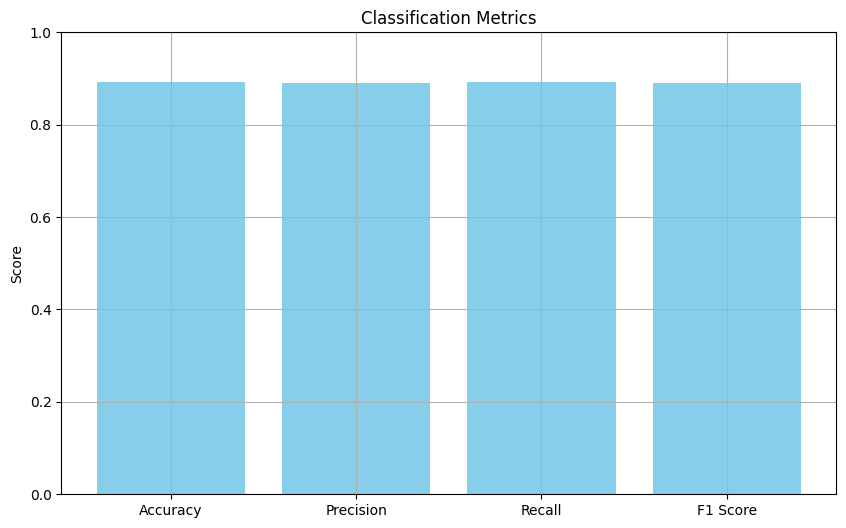

In [48]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, precision_score, recall_score
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
#Setting the average parameter to 'weighted' for multi-class classification
precision = precision_score(y_test, y_pred, average='weighted') # Changed line
recall = recall_score(y_test, y_pred, average='weighted') # Changed line
f1 = f1_score(y_test, y_pred, average='weighted') # Changed line

# Print classification report
print(classification_report(y_test, y_pred))

# Plotting the metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color='skyblue')
plt.title('Classification Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

#Plotting the ROC and Finding the Area Under the Curve (AUC) for muilti-class data

In [49]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize, LabelBinarizer

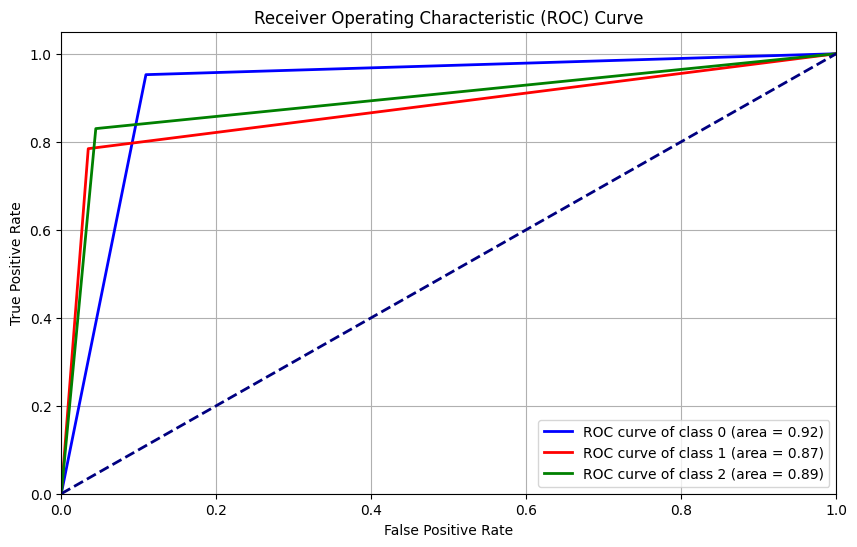

In [50]:
# Binarize the output
lb = LabelBinarizer()
lb.fit(y_test)
y_test_bin = lb.transform(y_test)
y_pred_bin = lb.transform(y_pred)

# Compute ROC curve and ROC area for each class
n_classes = y_test_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(10, 6))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Adjust colors as needed
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()